In [36]:
import molgrid
import torch
import matplotlib.pyplot as plt

In [37]:
# atom typing based on atomic number and valence, with a constant radius of 1.5
def mytyper(atom):
    if hasattr(atom, 'GetValence'):
        return ([atom.GetAtomicNum(),atom.GetValence()], 1.5)
    else:
        return ([atom.GetAtomicNum(),atom.GetExplicitDegree()], 1.5)

In [38]:
# Load an example batch. I'm pretty sure we somehow specify the typer here, but
# not certain how. See
# https://gnina.github.io/libmolgrid/python/index.html#the-exampleprovider-class

### HELP US DAVID KOES!!! ###

example = molgrid.ExampleProvider(
    default_batch_size=1
)
example.populate("test.types")

In [39]:
# Extract labels and voxel grid
device="cuda"
terms = torch.zeros(
    (1, example.num_labels()), dtype=torch.float32, device=device
)
input_voxel = torch.zeros(
    (1,) + (28, 48, 48, 48), dtype=torch.float32, device=device
)
test_batch = example.next_batch()
test_batch.extract_labels(terms)

In [32]:
# Make the grid and get the batch data
gmaker = molgrid.GridMaker()
gmaker.forward(test_batch, input_voxel)

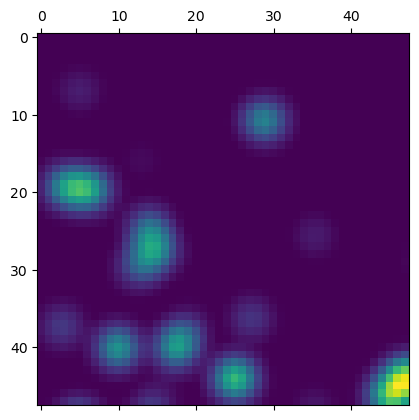

In [35]:

# Get the first item in the batch and visualize to confirm successful loading
input_voxel_first_from_batch = input_voxel.cpu()[0]
slice = input_voxel_first_from_batch[0,24,:,:]
plt.matshow(slice)
